#### Импорт базовых библиотек

In [1]:
!python --version

Python 3.7.3


In [2]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\iverendeev\appdata\local\continuum\anaconda3\lib\site-packages (1.0.2)


In [3]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\iverendeev\appdata\local\continuum\anaconda3\lib\site-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: 


In [4]:
import numpy as np
import pandas as pd
import scipy as sc
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.neighbors import KernelDensity

import seaborn
import scipy.stats as st
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#### Чтение исходных данных:

In [5]:
DATA_PATH = r"data_ml_v3-02.csv"
raw_df = pd.read_csv(DATA_PATH)

In [6]:
x = raw_df['x1'].tolist()
y = raw_df['x2'].tolist()

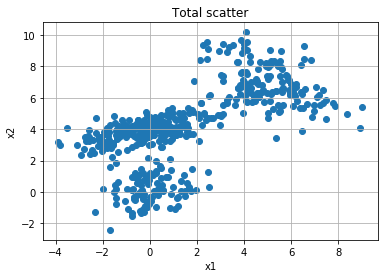

In [7]:
plt.title("Total scatter")

plt.scatter(x, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

#### Задания
1) Визуализировать плотность распределения, восстановленную с помощью наивного метода, для различных значений ширины окон: а) рассчитанной по правилу Сильвермана; б) слишком большой ширине окна; в) слишком малой ширине окна.

Найдем оптимальное окно для правила Сильвермана:

In [8]:
KernelDensity(bandwidth="silverman")

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
kde = KernelDensity(bandwidth="silverman").fit(values)
kde.bandwidth_

In [ ]:
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [ ]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

In [ ]:
cf = confusion_matrix(raw_df['true_label_named'], raw_df['pred_label_named'])

cm_display = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
TN = cf[0][0]
FN = cf[1][0]
FP = cf[0][1]
TP = cf[1][1]

2) Рассчитать показатели, основанные на таблице сопряженности: error rate, accuracy, sensitivity, specificity, precision, fall-out, F1-score, Cohen’s kappa.

In [ ]:
metrics = {"status": "original"}

In [ ]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
metrics['accuracy'] = [accuracy]

print(f"Accuracy = {round(accuracy, 2)}")

In [ ]:
error_rate = (FN + FP) / (TN + FN + FP + TP)
metrics['error_rate'] = [error_rate]

print(f"Error rate = {round(error_rate, 2)}")

In [ ]:
sensitivity = TP / (TP + FN)
metrics['sensitivity'] = [sensitivity]

print(f"Sensitivity = {round(sensitivity, 2)}")

In [ ]:
specificity = TN / (TN + FP)
metrics['specificity'] = [specificity]

print(f"Specificity = {round(specificity, 2)}")

In [ ]:
precision = TP / (TP + FP)
metrics['precision'] = [precision]

print(f"Precision = {round(precision, 2)}")

In [ ]:
recall = TP / (TP + FN)
metrics['recall'] = [recall]

print(f"Recall = {round(recall, 2)}")

In [ ]:
fall_out = FP / (FP + TN)
metrics["fall_out"] = [fall_out]

print(f"Fall out = {round(fall_out, 2)}")

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
metrics['f1_score'] = [f1_score]

print(f"F1 = {round(f1_score, 2)}")

In [ ]:
cohens_kappa = 2 * (TP * TN - FN * FP) / ((TP + FP) * (FP + TN) + (TP + FN) * (FN + TN))
metrics['cohens_kappa'] = [cohens_kappa]

print(f"Cohen’s kappa = {round(cohens_kappa, 2)}")

In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

3) Построить график зависимости F().

In [ ]:
f_betta = lambda x: (1 + x**2) * (precision * recall) / (x**2 * precision + recall)

In [ ]:
x = range(1, 10)
y = [f_betta(xi) for xi in x]

plt.title("F score by betta factor")

plt.plot(x, y)
plt.xlabel('Betta')
plt.ylabel('F score')
plt.grid()
plt.show()

Построить графики зависимости чувствительности и специфичности от объёма выборки.

In [ ]:
cf.shape

In [ ]:
def dataset(size: int):
    tmp_df = raw_df.sample(size)
    cf = confusion_matrix(tmp_df["true_label_named"], tmp_df["pred_label_named"])
    if cf.shape == (1, 1):
        TN = 0
        FN = 0
        FP = cf[0][0]
        TP = 0
    elif cf.shape == (1, 2):
        TN = cf[0][1]
        FN = 0
        FP = cf[0][0]
        TP = 0
    else:
        TN = cf[0][0]
        FN = cf[1][0]
        FP = cf[0][1]
        TP = cf[1][1]
    return 0 if TP + FN == 0 else TP / (TP + FN), 0 if TN + FP == 0 else TN / (TN + FP)


def experiments(size: int):
    sens, spec = 0, 0
    for i in range(1000):
        tmp_sens, tmp_spec = dataset(size)
        sens += tmp_sens
        spec += tmp_spec
    return sens / 1000, spec / 1000


sensitivity, specificity = experiments(3)

In [ ]:
%%time
x = range(1, 350, 10)
y = [experiments(xi) for xi in tqdm(x)]

In [ ]:
plt.title("Sensitivity, specificity by sample size")

plt.plot(x, [yi[0] for yi in y], label='sensitivity')
plt.plot(x, [yi[1] for yi in y], label='specificity')
plt.xlabel('Sample size')
plt.ylabel('Sensitivity, specificity')
plt.legend()
plt.grid()
plt.show()

5) Сравнить значения показателей, основанных на таблице сопряженности,  для случая, если положительные и отрицательные классы инвертированы (т.е. если все метки +1 заменить на -1, и все метки -1 – на +1).

In [ ]:
raw_inversed_df = raw_df.copy()
raw_inversed_df["exp"] = raw_inversed_df["score"].apply(lambda x: 1 / (1 + np.exp(-x)))
raw_inversed_df["pred_label"] = raw_inversed_df["exp"].apply(
    lambda x: 1 if x >= 0.5 else -1
)
raw_inversed_df["true_label_named"] = raw_inversed_df["label"].apply(
    lambda x: {-1: "positive", 1: "negative"}[x]
)
raw_inversed_df["pred_label_named"] = raw_inversed_df["pred_label"].apply(
    lambda x: {-1: "positive", 1: "negative"}[x]
)

In [ ]:
print(f"Data-size: {raw_df.shape[0]}")
print(f"Equal prediction: {raw_df[raw_df['true_label_named'] == raw_df['pred_label_named']].shape[0]}")
print(f"Non equal prediction: {raw_df[raw_df['true_label_named'] != raw_df['pred_label_named']].shape[0]}")

In [ ]:
cf = confusion_matrix(raw_inversed_df['true_label_named'], raw_inversed_df['pred_label_named'])

TN = cf[0][0]
FN = cf[1][0]
FP = cf[0][1]
TP = cf[1][1]

In [ ]:
metrics = {"status": "inversed"}

In [ ]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
metrics['accuracy'] = [accuracy]

print(f"Accuracy = {round(accuracy, 2)}")

error_rate = (FN + FP) / (TN + FN + FP + TP)
metrics['error_rate'] = [error_rate]

print(f"Error rate = {round(error_rate, 2)}")

sensitivity = TP / (TP + FN)
metrics['sensitivity'] = [sensitivity]

print(f"Sensitivity = {round(sensitivity, 2)}")

specificity = TN / (TN + FP)
metrics['specificity'] = [specificity]

print(f"Specificity = {round(specificity, 2)}")

precision = TP / (TP + FP)
metrics['precision'] = [precision]

print(f"Precision = {round(precision, 2)}")

recall = TP / (TP + FN)
metrics['recall'] = [recall]

print(f"Recall = {round(recall, 2)}")

fall_out = FP / (FP + TN)
metrics["fall_out"] = [fall_out]

print(f"Fall out = {round(fall_out, 2)}")

f1_score = 2 * (precision * recall) / (precision + recall)
metrics['f1_score'] = [f1_score]

print(f"F1 = {round(f1_score, 2)}")

cohens_kappa = 2 * (TP * TN - FN * FP) / ((TP + FP) * (FP + TN) + (TP + FN) * (FN + TN))
metrics['cohens_kappa'] = [cohens_kappa]

print(f"Cohen’s kappa = {round(cohens_kappa, 2)}")

In [ ]:
metrics_df2 = pd.DataFrame.from_dict(metrics)
metrics_df = pd.concat([metrics_df, metrics_df2])
metrics_df

6) Сделать выводы о качестве классификации на основе рассчитанных значений показателей.